In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [2]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
%matplotlib inline

Using TensorFlow backend.


In [3]:
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_inference"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names)
    NUM_CLASSES = 1+80

In [4]:
config = myMaskRCNNConfig()

In [5]:
print("loading  weights for Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='C:/Users/sohyeon/Mask_RCNN')

loading  weights for Mask R-CNN model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
model.load_weights('mask_rcnn_coco.h5', by_name=True)

In [8]:
class_names = ['BG','person','bicycle','car','motorcycle','airplane',
               'bus','train','truck','boat','traffic light',
               'fire hydrant','stop sign','parking meter','bench',
              'bird','cat','dog','horse','sheep','cow','elephant',
              'bear','zebra','giraffe','backpack','umbrella',
              'handbag','tie','suitcase','frisbee','skis','snowboard',
              'sports ball','kite','baseball bat','baseball glove',
              'skateboard','surfboard','tennis racket','bottle',
              'wine glass','cup','fork','knife','spoon','bowl',
              'banana','apple','sandwich','orange','broccoli',
              'carrot','hot dog','pizza','donut','cake','chair',
              'couch','potted plant','bed','dining table','toilet',
              'tv','laptop','mouse','remote','keyboard','cell phone',
              'microwave','oven','toaster','sink','refrigerator',
              'book','clock','vase','scissors','teddy bear',
              'hair drier','toothbrush']

In [9]:
# draw an image with detected objects

def draw_image_with_boxes(filename, boxes_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for box in boxes_list:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red', lw=5)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

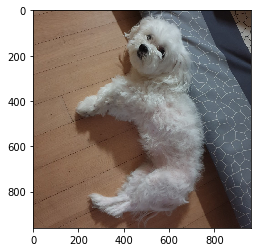

In [10]:
# test - one object
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('C:/Users/sohyeon/Documents/카카오톡 받은 파일/체리체링.jpg')
pyplot.imshow(img)
img = img_to_array(img)

In [11]:
# make prediction
results = model.detect([img], verbose=0)

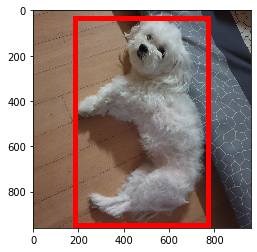

In [12]:
# visualize the results
draw_image_with_boxes('C:/Users/sohyeon/Documents/카카오톡 받은 파일/체리체링.jpg', results[0]['rois'])

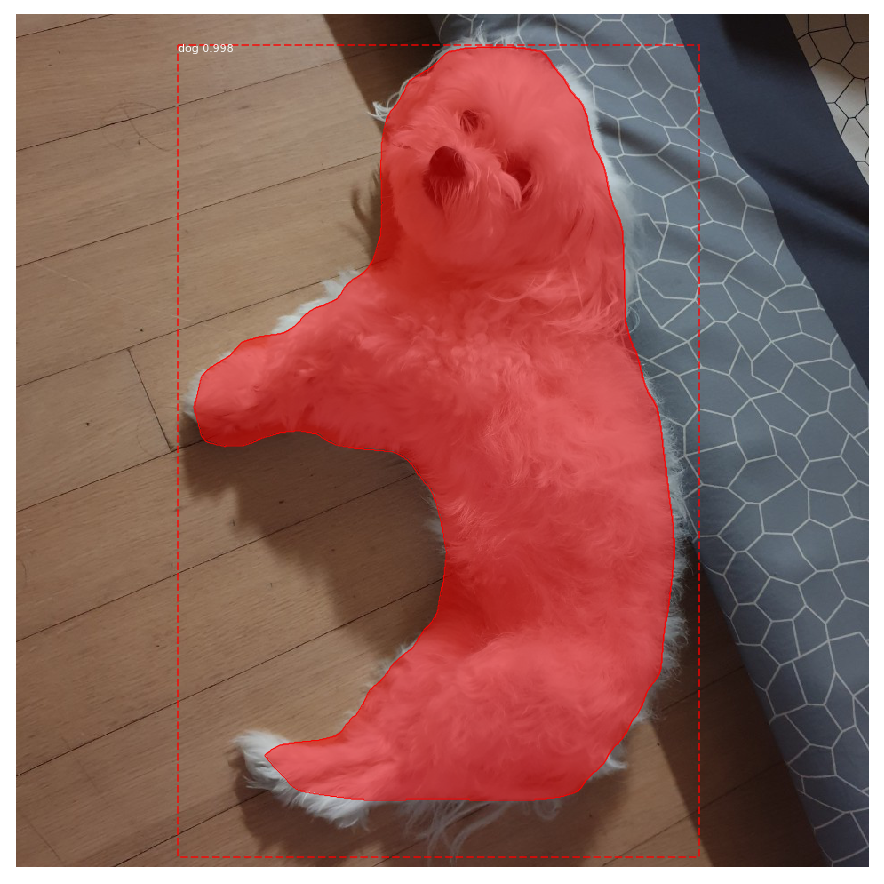

In [14]:
# get dictionary for first prediction
from mrcnn.visualize import display_instances
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [15]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 1
dog


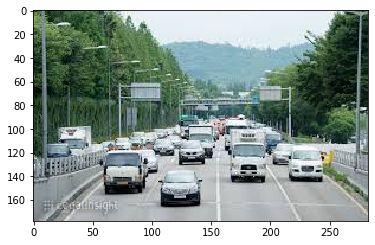

In [16]:
#test - two or more object

img = load_img('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg')
pyplot.imshow(img)
img = img_to_array(img)

In [17]:
results = model.detect([img], verbose=0)

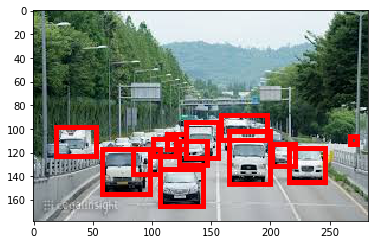

In [18]:
draw_image_with_boxes('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg', results[0]['rois'])

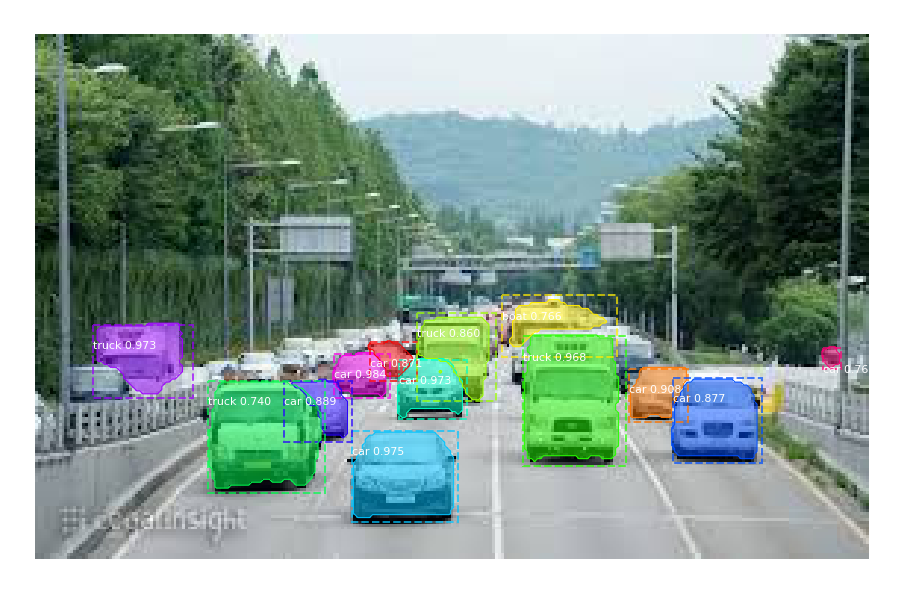

In [19]:
from mrcnn.visualize import display_instances
r = results[0]

display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [20]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 13
car
car
car
truck
truck
car
car
car
car
truck
car
boat
truck
